In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# os.chdir('drive/My Drive/Datasets/')
os.listdir()

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [ ]:
dataset = pd.read_csv('housing.csv')

In [ ]:
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# dataset.corr()

In [ ]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="medv", height=3);
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10db62ee48>,
      dtype=object)

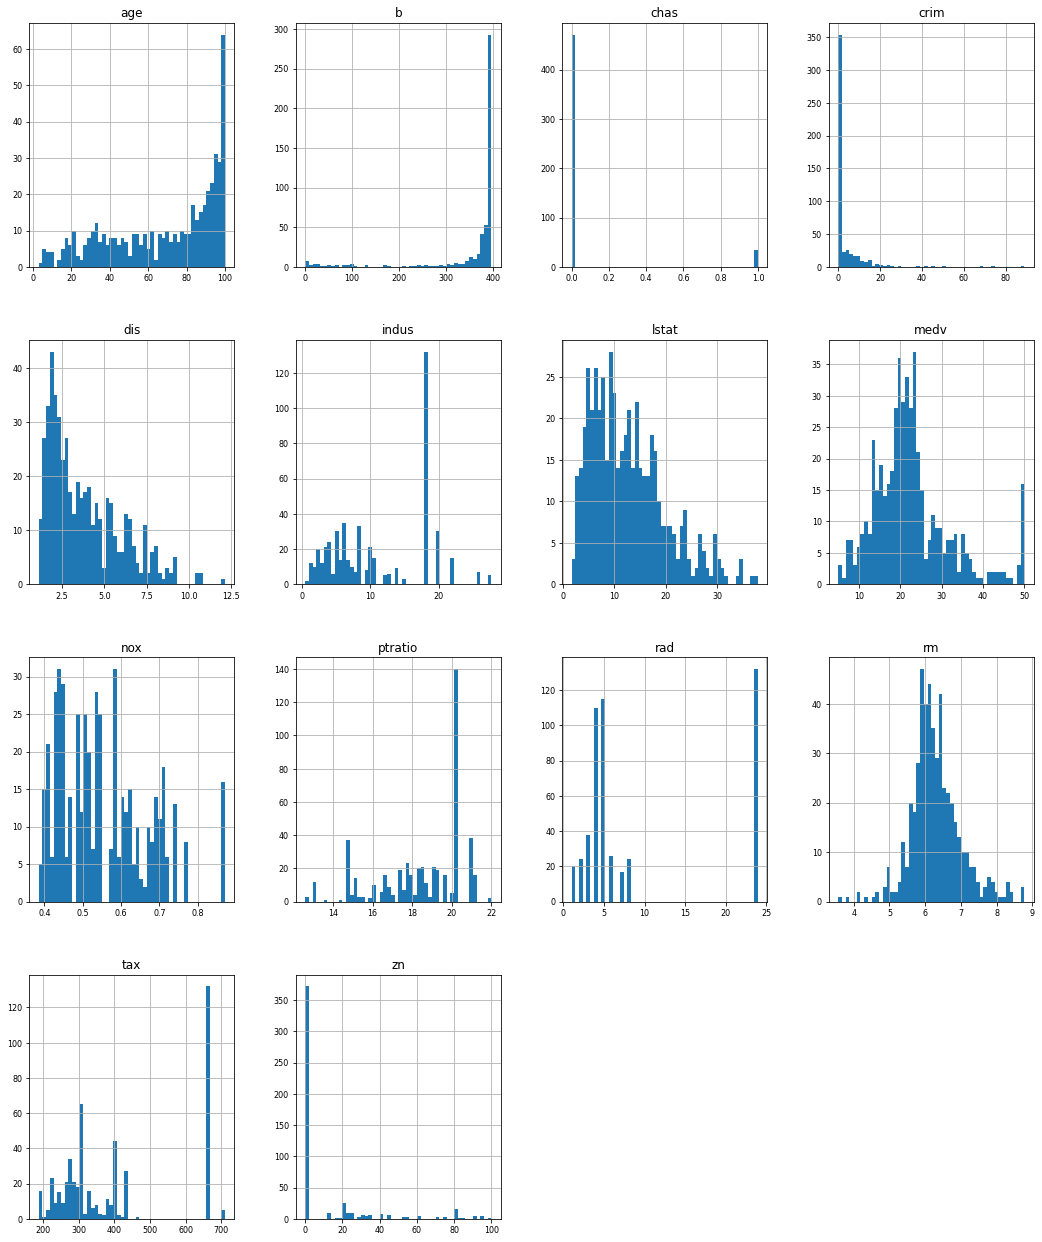

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

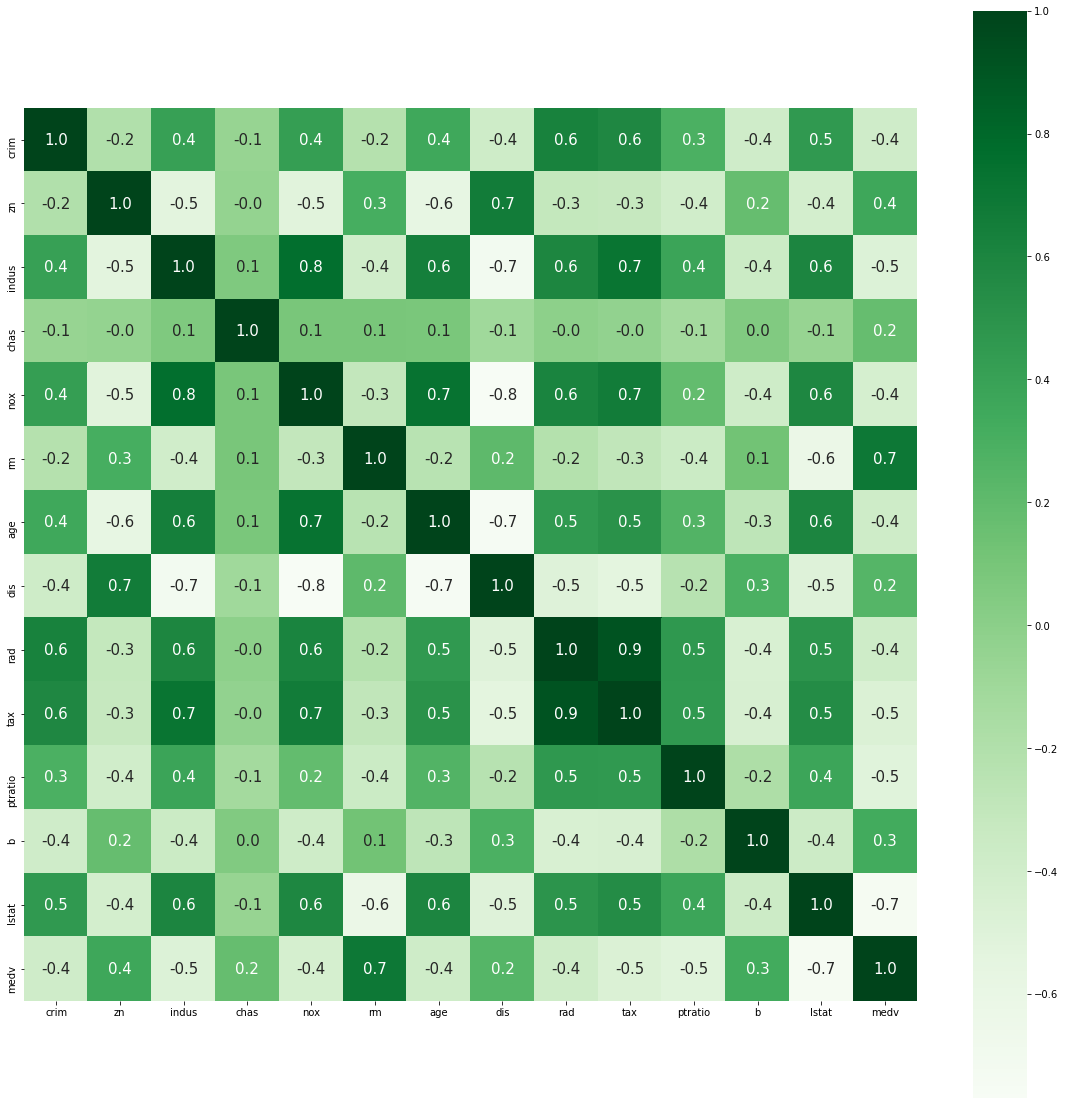

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
feature = dataset.drop(['medv'], axis=1)
label = dataset['medv']

In [ ]:
scaler = PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

feature_scaled = scaler.fit_transform(feature.values) 
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

In [ ]:
def preproces(type_of_transform):
  scaler = type_of_transform

  feature_scaled = scaler.fit_transform(feature.values) 
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)
  
  lin_reg = LinearRegression()
  lin_reg.fit(feature_train, label_train)

  predictions = lin_reg.predict(feature_test)

  print("\nprediksi menggunakan ", type_of_transform)
  # print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
  print("r2 score")
  print(r2_score(label_test, predictions))
  print("RMSE")
  print(np.sqrt(mean_squared_error(label_test, predictions)))


In [ ]:
preproces(StandardScaler())


prediksi menggunakan  StandardScaler(copy=True, with_mean=True, with_std=True)
r2 score
0.67455850659494
RMSE
5.695835030617264


In [ ]:
preproces(PowerTransformer())


prediksi menggunakan  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
r2 score
0.7454609164768617
RMSE
5.0373041974348345


In [ ]:
preproces(QuantileTransformer())


prediksi menggunakan  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
r2 score
0.7037102334418097
RMSE
5.434746181672558


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:
preproces(MinMaxScaler())


prediksi menggunakan  MinMaxScaler(copy=True, feature_range=(0, 1))
r2 score
0.6745585065949401
RMSE
5.695835030617263


In [ ]:
preproces(MaxAbsScaler())


prediksi menggunakan  MaxAbsScaler(copy=True)
r2 score
0.6745585065949404
RMSE
5.69583503061726


In [ ]:
preproces(RobustScaler())


prediksi menggunakan  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
r2 score
0.6745585065949404
RMSE
5.69583503061726


In [ ]:
preproces(power_transform(feature,method='box-cox'))

ValueError: ignored

In [ ]:
scaler =  power_transform(feature,method='box-cox',standardize=True, copy=True )

feature_scaled = scaler.fit_transform(feature.values) 
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

lin_reg = LinearRegression()
lin_reg.fit(feature_train, label_train)

predictions = lin_reg.predict(feature_test)

print("\nprediksi menggunakan Box Cox")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

ValueError: ignored

Untuk hasil dari beberapa metode transformasi nilai akurasi nya hampir sama semua untuk metode **StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler()** yaitu **0.6745**, sedangkan untuk metode **QuantileTransformer()** nilai akurasi nya sedikit lebih tinggi yaitu **0.7037** dan nilai akurasi yang paling tinggi didapatkan dengan menggunakan metode **yeo-johnson** yaitu **0.7454**.
Untuk Metode **Box Cox Transformation** mengalami error karena metode ini hanya bisa digunakan pada data yang positif sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. .

In [ ]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=800, bootstrap=True, max_features = "sqrt",max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None)
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9816882978650908
RMSE
1.1941515162966878

prediksi menggunakan testing set
r2 score
0.8540464447985319
RMSE
3.814417966154438


In [ ]:
#XGBoost
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=600, verbosity=1, objective='reg:squarederror', booster='gbtree',)
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9993213667753291
RMSE
0.22988605937685153

prediksi menggunakan testing set
r2 score
0.8959111104543348
RMSE
3.221240330299335


In [ ]:
#SVM Regressor
svm_reg = SVR(kernel='rbf', C=50.0)
svm_reg.fit(feature_train, label_train)

predictions = svm_reg.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = svm_reg.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9541844323758416
RMSE
1.888868014856172

prediksi menggunakan testing set
r2 score
0.8937845924504191
RMSE
3.2539786574154075


In [ ]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=20, leaf_size=30, p=2, n_jobs=None, algorithm='auto')
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.725178390868328
RMSE
4.626158579837568

prediksi menggunakan testing set
r2 score
0.6347799998375485
RMSE
6.033901500922487


Nilai **r2score** yang paling tinggi didapatkan dengan menggunakan algoritma **XGBoost** yaitu 0.**8959** dan nilai **RMSE 3.22**.